# Airbnb: predicción de precios de hosts

In [1]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("airbnb_data.csv")

In [3]:
df.head()

,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,...,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,price
0,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,...,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0,169.0
1,Apartment,Private room,"{TV,""Wireless Internet"",Heating,""Smoke detecto...",2,1.0,Real Bed,strict,True,SF,Beautiful private room overlooking scenic view...,...,-122.429526,Comfort Suite San Francisco,Noe Valley,3,100.0,https://a0.muscache.com/im/pictures/82509143-4...,94131,1.0,1.0,85.0
2,Condominium,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Wheelchair...",2,1.0,Real Bed,moderate,True,LA,Arguably the best location (and safest) in dow...,...,-118.260439,"Near LA Live, Staple's. Starbucks inside. OWN ...",Downtown,9,93.0,https://a0.muscache.com/im/pictures/61bd05d5-c...,90015,1.0,1.0,120.0
3,House,Private room,"{TV,""Cable TV"",""Wireless Internet"",""Pets live ...",2,1.0,Real Bed,moderate,True,SF,Garden Studio with private entrance from the s...,...,-122.501095,Cozy Garden Studio - Private Entry,Richmond District,159,99.0,https://a0.muscache.com/im/pictures/0ed6c128-7...,94121,1.0,1.0,120.0
4,Apartment,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Real Bed,strict,True,NYC,This is a bright bedroom in an historic buildi...,...,-73.983880,Large East Village Bedroom To Let!,Alphabet City,82,93.0,https://a0.muscache.com/im/pictures/21726900/1...,10009.0,1.0,1.0,100.0


In [4]:
df.shape

(28877, 28)

In [5]:
df.columns

Index(['property_type', 'room_type', 'amenities', 'accommodates', 'bathrooms',
       'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'description', 'first_review', 'host_has_profile_pic',
       'host_identity_verified', 'host_response_rate', 'host_since',
       'instant_bookable', 'last_review', 'latitude', 'longitude', 'name',
       'neighbourhood', 'number_of_reviews', 'review_scores_rating',
       'thumbnail_url', 'zipcode', 'bedrooms', 'beds', 'price'],
      dtype='object')

In [6]:
df[['first_review', 'host_has_profile_pic','host_identity_verified', 'host_response_rate', 'host_since','instant_bookable', 'last_review']].head()

,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review
0,2017-08-05,t,f,100%,2017-06-19,t,2017-09-23
1,2017-08-27,t,t,100%,2017-06-07,t,2017-09-05
2,2016-12-16,t,t,100%,2013-05-18,f,2017-04-12
3,2016-02-13,t,f,100%,2015-06-04,f,2017-09-24
4,2013-04-28,t,t,100%,2013-03-27,f,2016-11-15


# Limpieza de los datos

### Tareas por hacer:
1. Ver colinealidades entre variables contínuas
2. Limpieza de categóricas y datetimes.
3. Extraer los valores de "amenities" en distintas columnas.
4. Ver la manera de pasar a nominal la columna neighbourhood o dropearla.
5. NaN's
6. Outliers y normalización de variables contínuas.
7. De categóricas a nominal: One-Hot-Encoding, Label-encoding?

## 1. Colinealidades

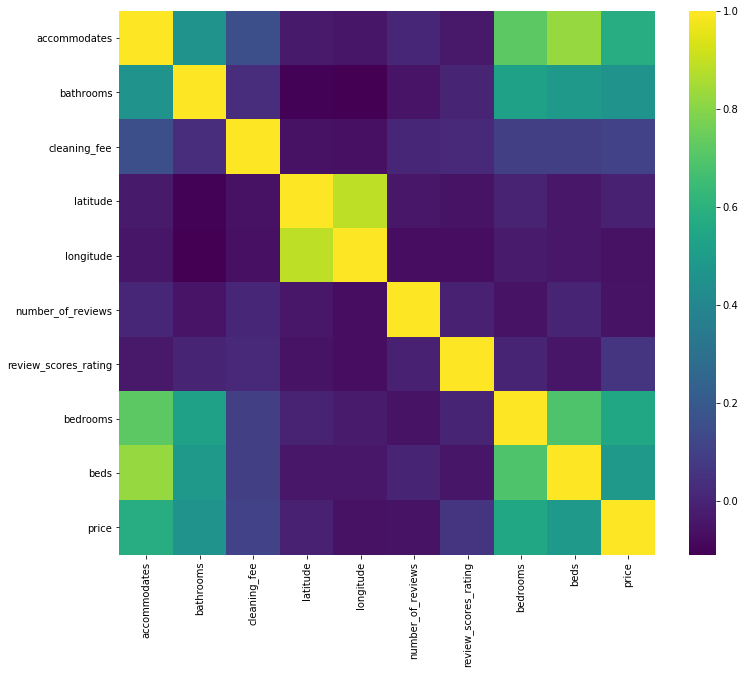

In [7]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='viridis');

In [8]:
#En este momento, la única correlación alta que existe es entre latitud y longitud.
#Como no usare estas columnas, las dropeare.
df.drop("latitude", axis=1, inplace=True)
df.drop("longitude", axis=1, inplace=True)

In [9]:
df.shape

(28877, 26)

## 2. Limpieza de categóricas y datetimes

### property_type

In [10]:
df.property_type.value_counts()

Apartment             18543
House                  6655
Condominium            1081
Townhouse               720
Loft                    552
Other                   260
Guesthouse              248
Bed & Breakfast         214
Bungalow                166
Guest suite              72
Dorm                     61
Villa                    54
In-law                   44
Hostel                   36
Cabin                    32
Timeshare                26
Camper/RV                24
Boat                     22
Boutique hotel           20
Serviced apartment        9
Castle                    9
Tent                      7
Vacation home             4
Hut                       4
Chalet                    4
Tipi                      3
Cave                      2
Earth House               2
Treehouse                 2
Yurt                      1
Name: property_type, dtype: int64

In [11]:
#voy a tomar en cuenta los primeros 6 conceptos, ya que se llevan más del 90% de los datos. 
#A los demás los voy a clasificar como 'Others'

In [12]:
for e in range(len(df)):
    if df.property_type[e] not in ['Apartment','House','Condominium','Townhouse','Loft','Guesthouse']:
        df.property_type[e] = "Other"

In [13]:
df.property_type.value_counts()

Apartment      18543
House           6655
Condominium     1081
Other           1078
Townhouse        720
Loft             552
Guesthouse       248
Name: property_type, dtype: int64

### room_type

In [14]:
df.room_type.value_counts()

Entire home/apt    16158
Private room       11993
Shared room          726
Name: room_type, dtype: int64

### bed_type

In [15]:
df.bed_type.value_counts()
#Casi el 100% de los datos estan concentrados en "Real Bed". No se si esto represente un sezgo para el modelo después.
#Aun si pusiera como "Others" los demás valores, creo que no tiene mucho caso esta columna.

Real Bed         28092
Futon              319
Pull-out Sofa      246
Airbed             146
Couch               74
Name: bed_type, dtype: int64

In [16]:
df.drop("bed_type", axis=1, inplace=True)

In [17]:
df.shape

(28877, 25)

### cancellation_policy

In [18]:
df.cancellation_policy.value_counts()
#Voy a integrar los valores "super_strict" como "strict"

strict             14816
moderate            8492
flexible            5539
super_strict_30       25
super_strict_60        5
Name: cancellation_policy, dtype: int64

In [19]:
for e in range(len(df)):
    if "super_" in df.cancellation_policy[e]:
        df.cancellation_policy[e] = "strict"

In [20]:
df.cancellation_policy.value_counts()

strict      14846
moderate     8492
flexible     5539
Name: cancellation_policy, dtype: int64

### cleaning_fee

In [21]:
df.cleaning_fee.value_counts()
#ya lista para pasar a contínua

True     23693
False     5184
Name: cleaning_fee, dtype: int64

### city

In [22]:
df.city.value_counts()
#ya lista para pasar a contínua

NYC        13379
LA          7571
SF          2713
DC          1815
Boston      1776
Chicago     1623
Name: city, dtype: int64

### description

In [23]:
df.description.value_counts()
#Demasiado complicado utilizar esta variable para el modelo:
    #diferentes idiomas
    #tendrías que encontrar comunes palabras? o algún denominador que te permita clasificar la descripción en distintos niveles

Hello, I've been running guest house for Koreans visiting U.S. for 3years, and recently decided to run this place for other travelers also. There are 10 room in the house. They are mostly dormitory rooms and couple of couple room and family room. This places are our women's dormitory in third floor. There are three rooms, but no doors. It is basically open space. There are 2 beds in two rooms and 4 in one room. I do not have closet in this room but there are hangers and mini shelves. My travelers usually put their baggage on the floor. There is one full bathroom only for women in 2nd floor, which you will be sharing with other women guests. Right next that bathroom, there is unisex half bathroom. All bathrooms have hair dryers. You cannot use kitchen, but you can use refrigerator.  I offer breakfast every morning from 7-10 am. Bread, cereal, fruits, coffee, milk and juice will be served. You can eat take-out food in the kitchen, but please wash dishes that you used and put trash in the

In [24]:
df.drop("description", axis=1, inplace=True)

In [25]:
df.shape

(28877, 24)

### name

In [26]:
df.name.value_counts()
#mismo tema con description

Brooklyn Oasis                                        4
Venice Beach Cottage                                  3
East Village Gem                                      3
Private 1 Bedroom Apartment                           3
Make的小屋（地理位置好，交通方便，洛杉矶市中心，提供机场名牌店景点等接送，包车游玩等服务）       3
Spacious Private Room in Brooklyn                     3
Bunk bed in the Treat Street Clubhouse                3
SHARED ROOM in VENICE BEACH HOSTEL                    3
Luxurious Shared Apartment in NY                      2
Cozy Private Room                                     2
Higher Suites                                         2
Silver Lake Guest House                               2
A beautiful 2-bedroom in Bay Ridge                    2
Room in heart of Williamsburg                         2
Private Room in the Heart of Boston                   2
One bedroom                                           2
Amazing View over Fenway                              2
GREAT studio in Los Feliz!                      

In [27]:
df.drop("name", axis=1, inplace=True)

In [28]:
df.shape

(28877, 23)

In [29]:
#first_review host_has_profile_pic host_identity_verified host_response_rate host_since instant_bookable last_review
df.head()

,property_type,room_type,amenities,accommodates,bathrooms,cancellation_policy,cleaning_fee,city,first_review,host_has_profile_pic,...,instant_bookable,last_review,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,price
0,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,strict,True,NYC,2017-08-05,t,...,t,2017-09-23,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0,169.0
1,Apartment,Private room,"{TV,""Wireless Internet"",Heating,""Smoke detecto...",2,1.0,strict,True,SF,2017-08-27,t,...,t,2017-09-05,Noe Valley,3,100.0,https://a0.muscache.com/im/pictures/82509143-4...,94131,1.0,1.0,85.0
2,Condominium,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Wheelchair...",2,1.0,moderate,True,LA,2016-12-16,t,...,f,2017-04-12,Downtown,9,93.0,https://a0.muscache.com/im/pictures/61bd05d5-c...,90015,1.0,1.0,120.0
3,House,Private room,"{TV,""Cable TV"",""Wireless Internet"",""Pets live ...",2,1.0,moderate,True,SF,2016-02-13,t,...,f,2017-09-24,Richmond District,159,99.0,https://a0.muscache.com/im/pictures/0ed6c128-7...,94121,1.0,1.0,120.0
4,Apartment,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,strict,True,NYC,2013-04-28,t,...,f,2016-11-15,Alphabet City,82,93.0,https://a0.muscache.com/im/pictures/21726900/1...,10009.0,1.0,1.0,100.0


### first_review

In [30]:
df.first_review.value_counts()
#Demasiados valores únicos

2017-01-01    147
2017-09-04    138
2017-01-02    107
2017-01-22    105
2017-04-16     95
2017-03-19     88
2017-04-09     88
2016-01-03     86
2016-10-09     83
2016-01-02     80
2017-07-16     77
2017-09-03     76
2017-09-10     75
2017-03-12     75
2016-10-16     74
2016-09-05     73
2017-08-13     71
2017-07-30     69
2017-03-26     69
2015-09-21     67
2016-11-06     67
2017-04-02     65
2016-11-13     65
2017-04-23     63
2017-07-31     61
2016-01-05     61
2016-10-30     61
2017-03-05     61
2017-09-17     60
2017-08-27     60
             ... 
2011-06-08      1
2012-02-02      1
2011-10-14      1
2010-05-13      1
2011-11-11      1
2012-12-05      1
2011-03-18      1
2012-10-06      1
2010-10-16      1
2010-07-04      1
2012-03-01      1
2012-03-07      1
2012-07-25      1
2012-11-03      1
2009-05-08      1
2011-05-29      1
2012-06-14      1
2012-02-13      1
2011-05-17      1
2012-12-13      1
2009-08-25      1
2010-03-16      1
2011-12-23      1
2011-04-19      1
2011-03-21

In [31]:
df.shape

(28877, 23)

In [32]:
df.drop("first_review", axis=1, inplace=True)
df.shape

(28877, 22)

### host_has_profile_pic

In [33]:
df.host_has_profile_pic.value_counts()
#practicamente el 100% de los datos son "true", no tiene sentido meter esta columna al modelo.

t    28829
f       48
Name: host_has_profile_pic, dtype: int64

In [34]:
df.shape

(28877, 22)

In [35]:
df.drop("host_has_profile_pic", axis=1, inplace=True)
df.shape

(28877, 21)

### host_identity_verified

In [36]:
df.host_identity_verified.value_counts()
#Si vale la pena conservar esta columna, además, ya estan listos los datos para pasarlos a contínuos.

t    20923
f     7954
Name: host_identity_verified, dtype: int64

### host_response_rate

In [37]:
#If you respond to all new inquiries and requests within 24 hours, then you have nothing to worry about; 
#your response rate should be 100%. Of course, if your response rate begins to falter for whatever reason, 
#your percentage will start to dip.
#http://darebnb.com/use-airbnbs-response-rate-to-your-advantage/
#https://www.hostyapp.com/airbnb-response-rate/

#Es decir, si un host siempre ha respondido a las solicitudes de los clientes dentro de 24 horas, su hot_response_rate sera 100%
#De lo contrario, el porcentaje ira disminuyendo.

In [38]:
df.host_response_rate.head(n=15)

0     100%
1     100%
2     100%
3     100%
4     100%
5     100%
6     100%
7     100%
8     100%
9      90%
10    100%
11     86%
12    100%
13    100%
14    100%
Name: host_response_rate, dtype: object

In [39]:
df.host_response_rate.value_counts()
#La mayoría de los huéspedes tienen un 100% de rate, sin embargo, no es un porcentaje tan grande como para dropear esta columna.
#Voy a reemplazar esta columna como boleano, que sea, 1: 100% rate, 0: >100% rate. Algo como HOT y NO HOT

100%    23319
90%      1241
80%       540
70%       252
50%       219
99%       197
97%       180
94%       178
96%       174
98%       170
92%       165
0%        165
67%       158
93%       154
60%       152
89%       151
95%       151
88%       139
83%       137
75%       134
86%       123
91%       123
78%        48
71%        45
87%        44
33%        42
40%        37
82%        37
85%        32
81%        29
        ...  
44%         9
64%         8
43%         7
53%         7
29%         7
76%         7
55%         7
69%         7
10%         7
74%         6
72%         6
38%         4
65%         4
62%         3
17%         3
52%         3
46%         2
47%         2
22%         2
42%         2
36%         2
14%         1
35%         1
61%         1
21%         1
15%         1
11%         1
59%         1
26%         1
31%         1
Name: host_response_rate, Length: 73, dtype: int64

In [40]:
type(df.host_response_rate)

pandas.core.series.Series

In [41]:
df['host_response']=pd.DataFrame(np.where(df.host_response_rate == '100%','HOT','NOT HOT'))
df.host_response.value_counts()

HOT        23319
NOT HOT     5558
Name: host_response, dtype: int64

In [42]:
df.shape

(28877, 22)

In [43]:
df.drop("host_response_rate", axis=1, inplace=True)
df.shape

(28877, 21)

### host_since

In [44]:
df.host_since.value_counts()
#Demasiados valores unicos

2014-02-14    110
2015-03-30     68
2014-09-02     41
2014-03-17     38
2016-01-18     37
2014-07-29     37
2016-08-23     37
2015-03-05     36
2015-08-19     36
2014-09-10     35
2014-04-30     35
2015-10-27     34
2012-08-27     34
2013-08-07     34
2015-07-29     31
2014-06-24     31
2015-06-18     31
2014-05-19     30
2015-07-06     30
2014-07-31     30
2014-07-02     30
2015-11-23     29
2016-02-10     29
2016-11-10     28
2014-06-02     28
2012-11-14     28
2014-09-17     28
2013-06-12     28
2015-08-10     27
2016-08-18     27
             ... 
2010-04-22      1
2011-03-13      1
2008-09-23      1
2010-07-23      1
2009-11-16      1
2010-08-15      1
2010-03-22      1
2011-07-22      1
2009-03-09      1
2010-05-29      1
2011-03-31      1
2010-06-18      1
2008-12-08      1
2010-11-06      1
2010-03-01      1
2010-08-11      1
2010-07-07      1
2010-06-09      1
2009-08-25      1
2010-07-21      1
2008-09-17      1
2010-06-24      1
2008-07-31      1
2010-09-05      1
2008-09-25

In [45]:
df.shape

(28877, 21)

In [46]:
df.drop("host_since", axis=1, inplace=True)
df.shape

(28877, 20)

### instant_bookable

In [47]:
df.instant_bookable.value_counts()
#lista para pasar a nominal

f    20005
t     8872
Name: instant_bookable, dtype: int64

### last_review

In [48]:
df.last_review.value_counts()
#Si existiera una variable que te diga la fecha en la que fueron recolectados los datos, prodrías sacar cuántos días
# han pasado entre el last_review y la fecha actual. Así, se puede hacer una clasificación por rangos y posiblemente sacarle
# provecho a esta variable.
#Por lo pronto: DROP

2017-09-24    916
2017-09-17    862
2017-04-30    689
2017-09-18    590
2017-09-25    585
2017-04-23    521
2017-10-01    518
2017-09-16    485
2017-09-28    481
2017-09-04    469
2017-09-15    454
2017-09-29    437
2017-09-30    435
2017-09-23    422
2017-09-26    404
2017-09-22    401
2017-09-10    393
2017-09-27    377
2017-05-07    371
2017-05-01    361
2017-04-16    361
2017-09-14    353
2017-09-21    346
2017-09-20    323
2017-04-24    320
2017-09-19    317
2017-04-29    285
2017-09-13    270
2017-09-11    265
2017-09-12    240
             ... 
2015-05-27      1
2016-03-21      1
2014-09-22      1
2014-12-22      1
2014-09-28      1
2012-02-14      1
2013-12-16      1
2014-08-23      1
2013-04-21      1
2011-03-28      1
2014-01-25      1
2014-09-09      1
2015-06-27      1
2015-09-15      1
2015-04-10      1
2014-06-15      1
2014-09-30      1
2015-03-22      1
2016-02-08      1
2015-11-21      1
2015-08-02      1
2016-03-19      1
2013-01-26      1
2015-12-06      1
2015-01-31

In [49]:
df.shape

(28877, 20)

In [50]:
df.drop("last_review", axis=1, inplace=True)
df.shape

(28877, 19)

### thumbnail_url

In [51]:
df.thumbnail_url.value_counts()

https://a0.muscache.com/im/pictures/104667326/a7a2b145_original.jpg?aki_policy=small             2
https://a0.muscache.com/im/pictures/61042471/5543b0e0_original.jpg?aki_policy=small              2
https://a0.muscache.com/im/pictures/23033013/54d62516_original.jpg?aki_policy=small              2
https://a0.muscache.com/im/pictures/70087089/bc66229a_original.jpg?aki_policy=small              2
https://a0.muscache.com/im/pictures/88737244-f1f6-424a-a399-a67317facedd.jpg?aki_policy=small    1
https://a0.muscache.com/im/pictures/c3c3bc22-607c-4e8c-a1c5-25dcc09ebc38.jpg?aki_policy=small    1
https://a0.muscache.com/im/pictures/c19e6819-198e-4e41-8eb6-ea6092c30237.jpg?aki_policy=small    1
https://a0.muscache.com/im/pictures/93143386/0f612a2d_original.jpg?aki_policy=small              1
https://a0.muscache.com/im/pictures/1ed4ddc7-2461-407a-8bfc-4350b1eb23ca.jpg?aki_policy=small    1
https://a0.muscache.com/im/pictures/bacfbebc-2d29-4e3c-ac3d-94cadc8d1390.jpg?aki_policy=small    1
https://a0

In [52]:
df.shape

(28877, 19)

In [53]:
df.drop("thumbnail_url", axis=1, inplace=True)
df.shape

(28877, 18)

## 3. Extraer los valores de "amenities"

In [54]:
df.amenities.head()

0    {"Wireless Internet","Air conditioning",Kitche...
1    {TV,"Wireless Internet",Heating,"Smoke detecto...
2    {TV,"Cable TV","Wireless Internet","Wheelchair...
3    {TV,"Cable TV","Wireless Internet","Pets live ...
4    {Internet,"Wireless Internet","Air conditionin...
Name: amenities, dtype: object

In [55]:
#Crear una lista de los elementos:
#df.amenities[6].replace("{","").replace("}","").replace('"','').split(sep=',')

#for e in range(len(df)):
    #df.amenities[e]=df.amenities[e].replace("{","").replace("}","").replace('"','').split(sep=',')
#este ciclo no terminó de correr, no se realmente por qué. Pero recuerdo que Yona muchas veces nos ha dicho que evitemos los ciclos.

df.amenities= df.amenities.apply(lambda x: x.replace("{","").replace("}","").replace('"','').split(sep=','))
#es por lo anterior que aplique un lambda

In [56]:
#Voy a crear un radio de amenities: obtendré el max(len) de amenities que existe y voy a utilizarlo para obtener un radio de 
# los demás valores. El registro que tenga este radio = 1 es el que tiene el 100% de amenidades.
temp=[len(e) for e in df.amenities]
amenities_ratio=[e/max(temp) for e in temp]

In [57]:
df['amenities_ratio']=pd.DataFrame(amenities_ratio)

In [58]:
df.shape

(28877, 19)

In [59]:
df.drop("amenities", axis=1, inplace=True)
df.shape

(28877, 18)

## 4. neighbourhood

In [60]:
df.neighbourhood.value_counts().head(n=80)

Williamsburg                        1139
Bedford-Stuyvesant                  1017
Mid-Wilshire                         660
Bushwick                             649
Hell's Kitchen                       604
Harlem                               592
Hollywood                            568
Upper West Side                      510
Upper East Side                      501
Venice                               495
Crown Heights                        461
Astoria                              368
East Harlem                          363
Mission District                     346
Lower East Side                      337
East Village                         314
Chelsea                              289
Long Beach                           278
West Hollywood                       275
Washington Heights                   269
Hamilton Heights                     267
Santa Monica                         261
Greenpoint                           260
Alphabet City                        251
Clinton Hill    

In [61]:
print(len(df.neighbourhood[df.city == 'NYC']),
        len(df.neighbourhood[df.city == 'LA']),
        len(df.neighbourhood[df.city == 'SF']),
        len(df.neighbourhood[df.city == 'DC']),
        len(df.neighbourhood[df.city == 'Boston']),
        len(df.neighbourhood[df.city == 'Chicago'])
     )

13379 7571 2713 1815 1776 1623


In [62]:
df.neighbourhood[df.city == 'NYC'].value_counts().head(n=15)

Williamsburg          1139
Bedford-Stuyvesant    1017
Bushwick               649
Hell's Kitchen         604
Harlem                 592
Upper West Side        510
Upper East Side        501
Crown Heights          461
Astoria                368
East Harlem            363
Lower East Side        337
East Village           314
Chelsea                289
Washington Heights     268
Hamilton Heights       267
Name: neighbourhood, dtype: int64

In [63]:
df.neighbourhood[df.city == 'LA'].value_counts()

Mid-Wilshire                 660
Hollywood                    568
Venice                       495
Long Beach                   278
West Hollywood               275
Santa Monica                 261
Silver Lake                  210
Echo Park                    186
Pasadena                     170
Downtown                     167
Hollywood Hills              163
Mar Vista                    149
Westlake                     137
North Hollywood              132
Westwood                     116
Del Rey                      112
West Los Angeles             109
Mid-City                     104
Westchester/Playa Del Rey    102
South LA                     101
Marina Del Rey                94
Burbank                       94
Glendale                      94
Sherman Oaks                  93
Culver City                   85
Redondo Beach                 82
Malibu                        81
Los Feliz                     80
Highland Park                 80
East Hollywood                79
          

In [64]:
df.neighbourhood[df.city == 'SF'].value_counts()

Mission District         346
Richmond District        167
Bernal Heights           156
Western Addition/NOPA    149
Noe Valley               148
SoMa                     144
The Castro               132
Outer Sunset             119
Potrero Hill              82
Nob Hill                  76
Pacific Heights           73
Haight-Ashbury            64
Downtown                  55
Duboce Triangle           54
Marina                    53
Bayview                   52
Inner Sunset              51
Alamo Square              47
Excelsior                 44
Lower Haight              43
Russian Hill              41
Parkside                  39
Sunnyside                 37
Cole Valley               34
South Beach               34
Glen Park                 34
Mission Terrace           33
Twin Peaks                31
Hayes Valley              28
North Beach               27
Telegraph Hill            26
Crocker Amazon            26
Tenderloin                25
Cow Hollow                24
Visitacion Val

In [65]:
#Voy a optar por borrar la variable neighborhood, ya que hay demasiados valores unicos para cada ciudad.
#Además, ya se tiene una columna con el código postal, que puede ayudar a sustituir esta info.
df.shape

(28877, 18)

In [66]:
df.drop("neighbourhood", axis=1, inplace=True)
df.shape

(28877, 17)

## 5. Na's

df.isnull().sum()

In [68]:
df.head()

,property_type,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,city,host_identity_verified,instant_bookable,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,price,host_response,amenities_ratio
0,Apartment,Entire home/apt,7,1.0,strict,True,NYC,f,t,6,93.0,10019,3.0,3.0,169.0,HOT,0.194805
1,Apartment,Private room,2,1.0,strict,True,SF,t,t,3,100.0,94131,1.0,1.0,85.0,HOT,0.129870
2,Condominium,Entire home/apt,2,1.0,moderate,True,LA,t,f,9,93.0,90015,1.0,1.0,120.0,HOT,0.337662
3,House,Private room,2,1.0,moderate,True,SF,f,f,159,99.0,94121,1.0,1.0,120.0,HOT,0.272727
4,Apartment,Private room,2,1.0,strict,True,NYC,t,f,82,93.0,10009.0,1.0,1.0,100.0,HOT,0.194805


## 6. Outliers y normalización de variables contínuas.